In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
np.random.seed(42)
project_dir = 'D:\\Heart_Disease_Project'
os.makedirs(project_dir, exist_ok=True)
os.makedirs(os.path.join(project_dir, 'notebooks'), exist_ok=True)
os.makedirs(os.path.join(project_dir, 'results'), exist_ok=True)


In [4]:
cleaned_data_path = os.path.join(project_dir, 'data', 'heart_disease_cleaned.csv')
df = pd.read_csv(cleaned_data_path)
X = df.drop('target',axis=1)
y=df['target']
numerical_cols=['age','trestbps','chol','thalach','oldpeak']
X=X.astype(float)

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [6]:
n_components = np.argmax(cumulative_variance_ratio >= 0.95) +1
print(f'Optimal number of components to retain 95% variance: {n_components}')

Optimal number of components to retain 95% variance: 13


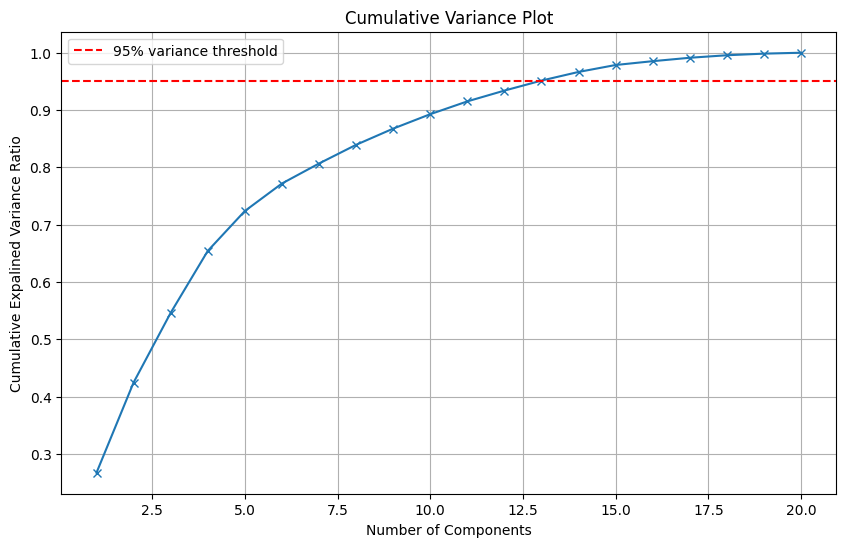

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(explained_variance_ratio)+1), cumulative_variance_ratio, marker='x')
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Expalined Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(project_dir, 'results', 'cumulative_variance_plot.png'))
plt.show()

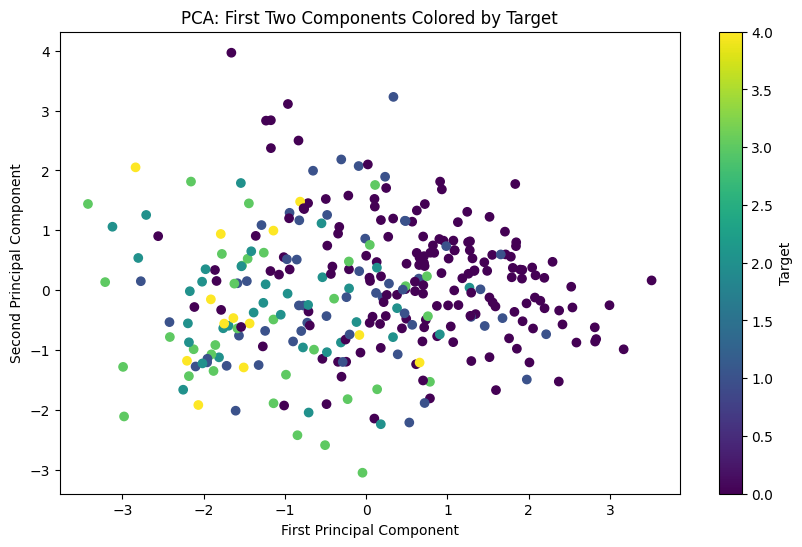

In [10]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=y, cmap='viridis')
plt.title('PCA: First Two Components Colored by Target')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Target')
plt.savefig(os.path.join(project_dir, 'results', 'pca_scatter_plot.png'))
plt.show()

In [11]:
pca_df = pd.DataFrame(X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1]) ])
pca_df['target']=y
pca_output_path = os.path.join(project_dir, 'data', 'heart_disease_pca.csv')
pca_df.to_csv(pca_output_path, index=False)
print(f"PCA-transformed dataset saved to {pca_output_path}")

PCA-transformed dataset saved to D:\Heart_Disease_Project\data\heart_disease_pca.csv
